In [13]:
from sklearn import ensemble
import pandas as pd
from sklearn import metrics
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('data/diabetes_cleaned.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


In [4]:
X = df[['Glucose', 'BMI']]
y = df['Outcome']

In [6]:
rf_cfl_2d = ensemble.RandomForestClassifier(
    criterion='entropy',
    max_depth=3,
    n_estimators=500,
    max_features='sqrt',
    random_state=42
)

rf_cfl_2d.fit(X, y)
y_pred = rf_cfl_2d.predict(X)
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       493
           1       0.73      0.57      0.64       264

    accuracy                           0.78       757
   macro avg       0.76      0.73      0.74       757
weighted avg       0.77      0.78      0.77       757



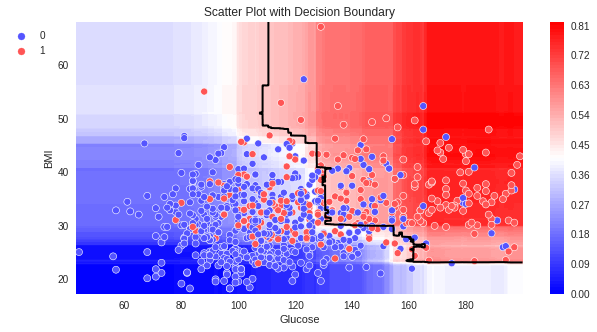

In [14]:
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость (линию, где вероятность равна 0.5)
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))
plot_probabilities_2d(X, y, rf_cfl_2d)

In [16]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

rf_clf_full = ensemble.RandomForestClassifier(
    n_estimators=300,
    criterion='entropy',
    max_depth=6,
    max_features='sqrt',
    random_state=42
)

rf_clf_full.fit(X, y)
y_pred = rf_clf_full.predict(X)

print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       493
           1       0.85      0.77      0.80       264

    accuracy                           0.87       757
   macro avg       0.86      0.85      0.85       757
weighted avg       0.87      0.87      0.87       757



Text(0, 0.5, 'importance')

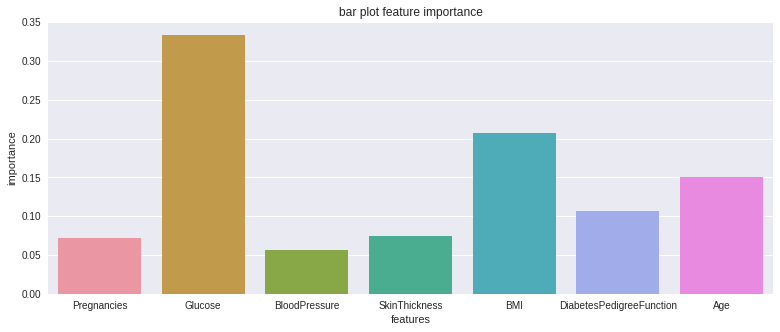

In [17]:
fig, ax = plt.subplots(figsize=(13,5))
features = X.columns
feature_importance = rf_clf_full.feature_importances_

sns.barplot(y=feature_importance, x=features, ax=ax)
ax.set_title('bar plot feature importance')
ax.set_xlabel('features')
ax.set_ylabel('importance')

In [19]:
wine_data = pd.read_csv('data/winequality-red.csv', sep=';')
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x >= 6 else 0)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
rf_cfl = ensemble.RandomForestClassifier(
    n_estimators=500,
    max_depth=8,
    min_samples_leaf=10,
    criterion='gini',
    max_features='sqrt',
    random_state=42
)

rf_cfl.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=10,
                       n_estimators=500, random_state=42)

In [23]:
y_pred_train = rf_cfl.predict(X_train)
y_pred_test = rf_cfl.predict(X_test)

In [24]:
print(metrics.classification_report(y_train, y_pred_train))
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       603
           1       0.87      0.84      0.85       676

    accuracy                           0.85      1279
   macro avg       0.85      0.85      0.85      1279
weighted avg       0.85      0.85      0.85      1279

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       141
           1       0.79      0.75      0.77       179

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

